## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [1]:
# Use this cell to begin your analysis, and add as many as you would like!

# Import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


# Set figure size parameters to see a bigger size figure

plt.rcParams['figure.figsize'] = [11, 7]

In [2]:
# Read the dataset into a pandas dataframe and have a look at the first 5 rows

df_office = pd.read_csv("datasets/office_episodes.csv")

df_office.head(5)

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [3]:
df_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [4]:
# Each episode's episode number

x = df_office[['episode_number']]

print(x)

     episode_number
0                 0
1                 1
2                 2
3                 3
4                 4
..              ...
183             183
184             184
185             185
186             186
187             187

[188 rows x 1 columns]


In [5]:
# Each episode's viewerwhip

y = df_office[['viewership_mil']]

print(y)

     viewership_mil
0             11.20
1              6.00
2              5.80
3              5.40
4              5.00
..              ...
183            3.83
184            3.25
185            3.51
186            4.56
187            5.69

[188 rows x 1 columns]


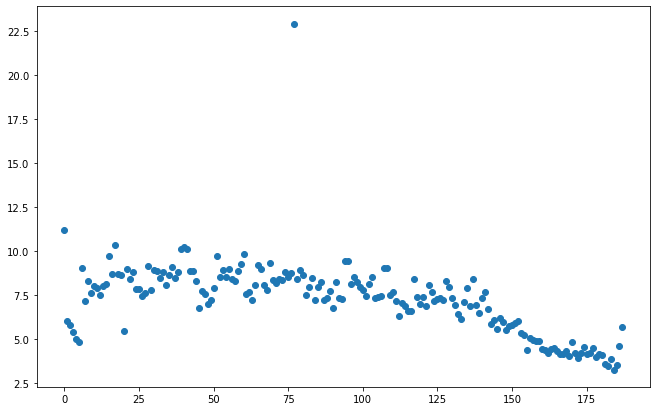

In [6]:
# Plot the row

plt.scatter(x,
            y,
           )

In [7]:
# Create an empty list for the s argument in scatter plot function

cols = []

for ind, row in df_office.iterrows():
   
    if row['scaled_ratings'] < 0.25:
        cols.append("red")
    
    elif row['scaled_ratings'] < 0.50:
        cols.append("orange")
    
    elif row['scaled_ratings'] < 0.75:
        cols.append("lightgreen")
    
    else:
        cols.append("darkgreen")
    
cols

['orange',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'darkgreen',
 'orange',
 'lightgreen',
 'orange',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'lightgreen',
 'darkgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'orange',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgr

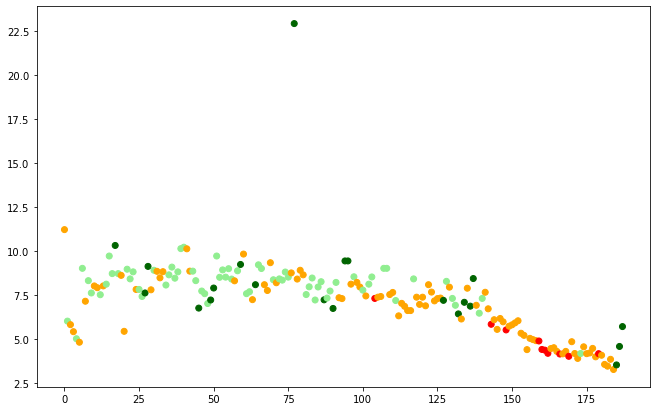

In [8]:
# Plot the row with c parameter

plt.scatter(x,
            y,
            c = cols
           )

In [9]:
# Create an empty list for the s argument in scatter plot function

size = []

for ind, row in df_office.iterrows():
   
    if row['has_guests'] == True:
        size.append(250)
    
    else:
        size.append(25)
    
size

[25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 250,
 25,
 25,
 250,
 25,
 250,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 250,
 250,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 25,
 250]

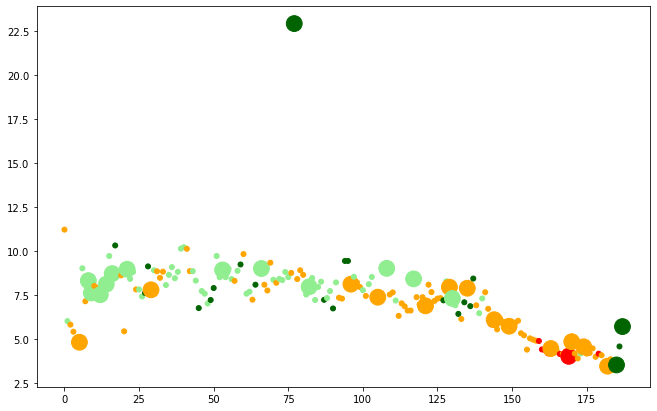

In [10]:
# Plot the row with c and s parameters

plt.scatter(x,
            y,
            c = cols,
            s = size
           )

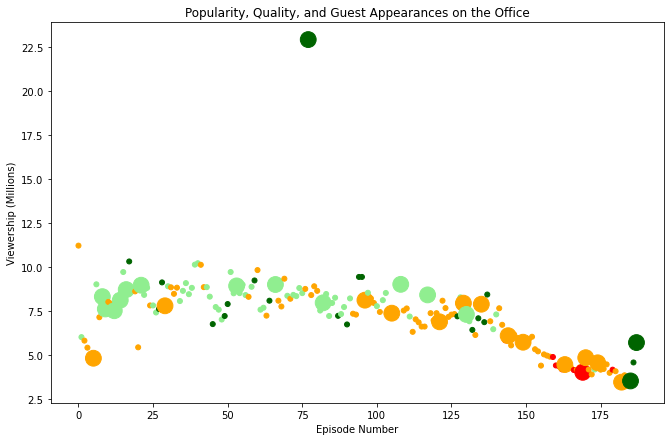

In [11]:
# Initialize a matplotlib object for tert 

fig = plt.figure()

# Plot the row with c and s parameters

plt.scatter(x,
            y,
            c = cols,
            s = size
           )

# Add a title and the axis names to the plot

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.show()

In [12]:
df_office.describe()

,episode_number,season,ratings,votes,viewership_mil,duration,scaled_ratings
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191,0.511636
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254,0.184353
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000,0.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000,0.375000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000,0.500000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000,0.625000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000,1.000000


In [13]:
# Subset the dataframe for the most viewed episode

df_office[df_office["viewership_mil"] > 20]

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,2009-02-01,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,True,0.96875


In [14]:
# Assign the guest star in the most watched episode to the top_star variable

top_star ="Jessica Alba"

print(top_star)

Jessica Alba
